## Replace piechart with good Barchart
#### Full article: 
http://varianceexplained.org/r/improving-pie-chart/

In [2]:
library(readr)

In [3]:
d <- read_csv("Task,< 1 a week,1-4 a week,1-3 a day,>4 a day
Basic exploratory data analysis,11,32,46,12
Data cleaning,19,42,31,7
Machine learning/statistics,34,29,27,10
Creating visualizations,23,41,29,7
Presenting analysis,27,47,20,6
Extract/transform/load,43,32,20,5")

# reorganize
library(tidyr)
d <- gather(d, Hours, Percentage, -Task)

In [10]:
d

,Task,Hours,Percentage
1,Basic exploratory data analysis,< 1 a week,11
2,Data cleaning,< 1 a week,19
3,Machine learning/statistics,< 1 a week,34
4,Creating visualizations,< 1 a week,23
5,Presenting analysis,< 1 a week,27
6,Extract/transform/load,< 1 a week,43
7,Basic exploratory data analysis,1-4 a week,32
8,Data cleaning,1-4 a week,42
9,Machine learning/statistics,1-4 a week,29
10,Creating visualizations,1-4 a week,41


#### Basic barplot

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

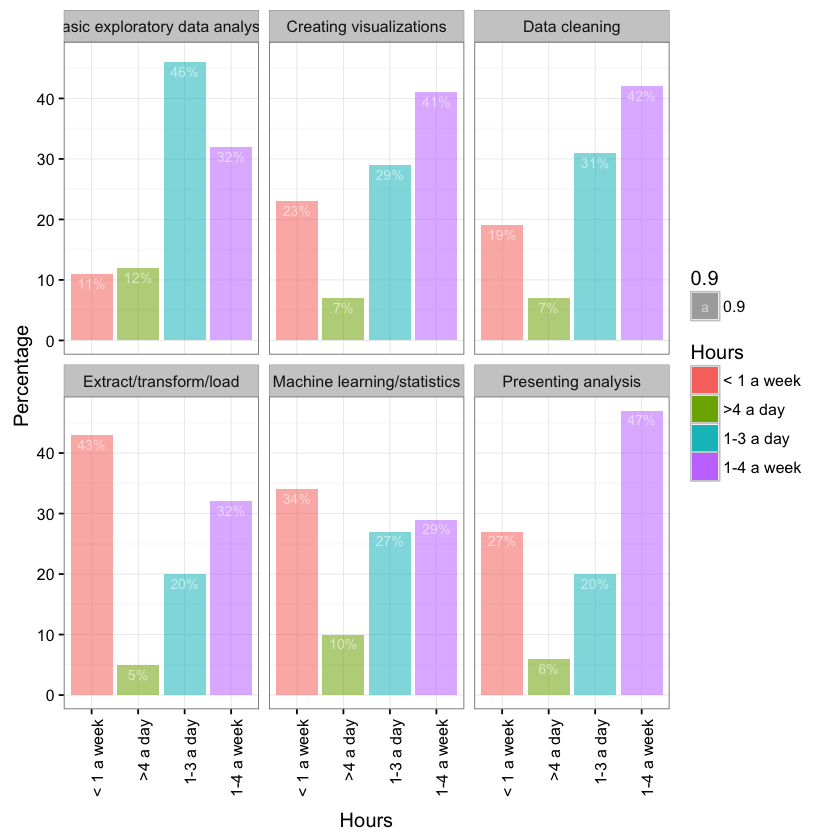

In [4]:
library(ggplot2)
theme_set(theme_bw())

ggplot(d, aes(Hours, Percentage, fill=Hours, alpha=0.9)) +
  geom_bar(stat = "identity") +
  facet_wrap(~Task) +
theme(axis.text.x = element_text(angle = 90,  hjust = 1)) + # Note: we rotate the x-axis text by 90 degree to make it easy to read
  geom_text(aes(label = paste0(Percentage, "%"), y = Percentage), # White text on the bars
            vjust = 1.4, size = 3, color = "white")



#### Use Tufte theme + Re-order Task based on Percentage on "< 1 a week".

To understand %>%, see http://www.r-bloggers.com/more-fun-with-and/


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



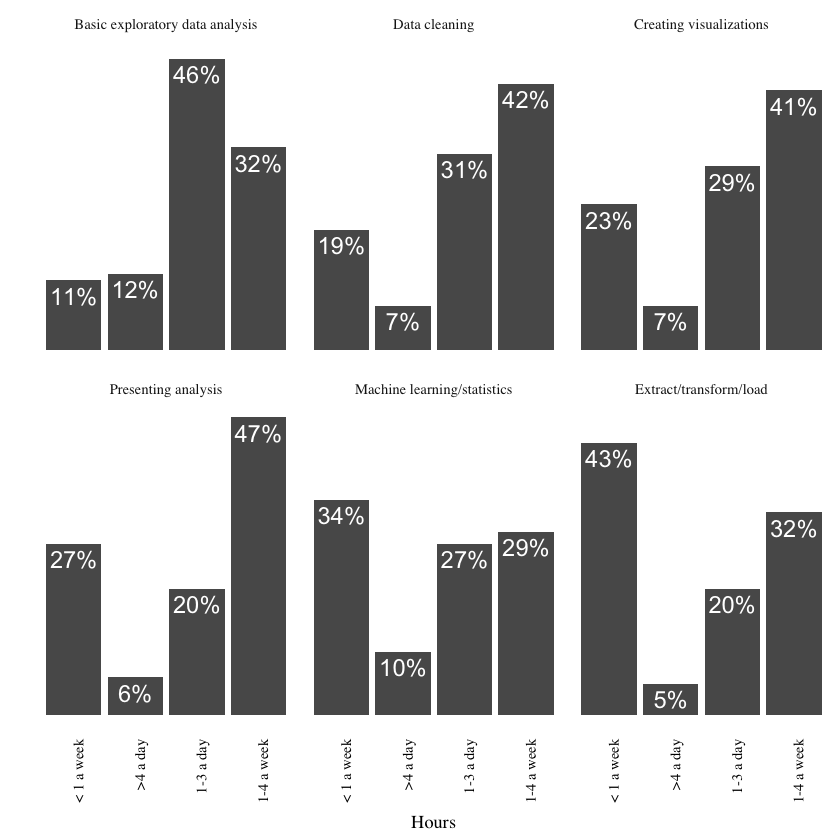

In [5]:
library(ggthemes)
library(dplyr)

d %>%
  mutate(Task = reorder(Task, Percentage, function(e) e[1])) %>%
  ggplot(aes(Hours, Percentage)) +
  geom_bar(stat = "identity") +
  facet_wrap(~Task) +
  geom_text(aes(label = paste0(Percentage, "%"), y = Percentage),
            vjust = 1.4, size = 5, color = "white") +
  theme_tufte() +
  theme(axis.text.x = element_text(angle = 90,  hjust = 1),
        axis.ticks = element_blank(),
        axis.text.y = element_blank()) +
  ylab("")

In [31]:
??theme_tufte

#### Use color line plots for easy comparison

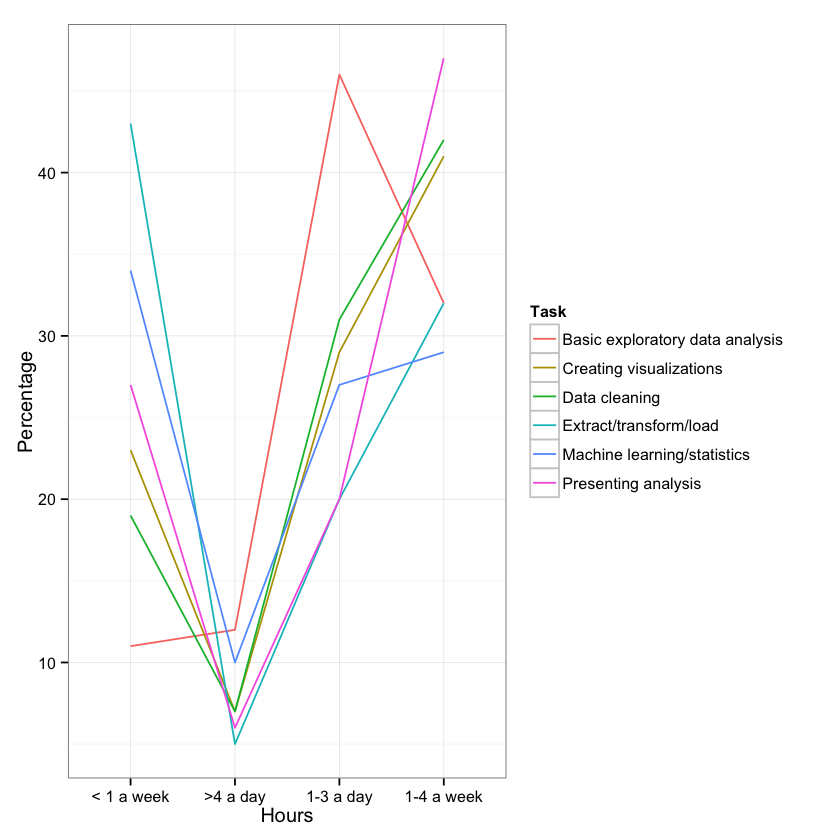

In [12]:
ggplot(d, aes(Hours, Percentage, color = Task, group = Task)) +
  geom_line()

#### A table approach.

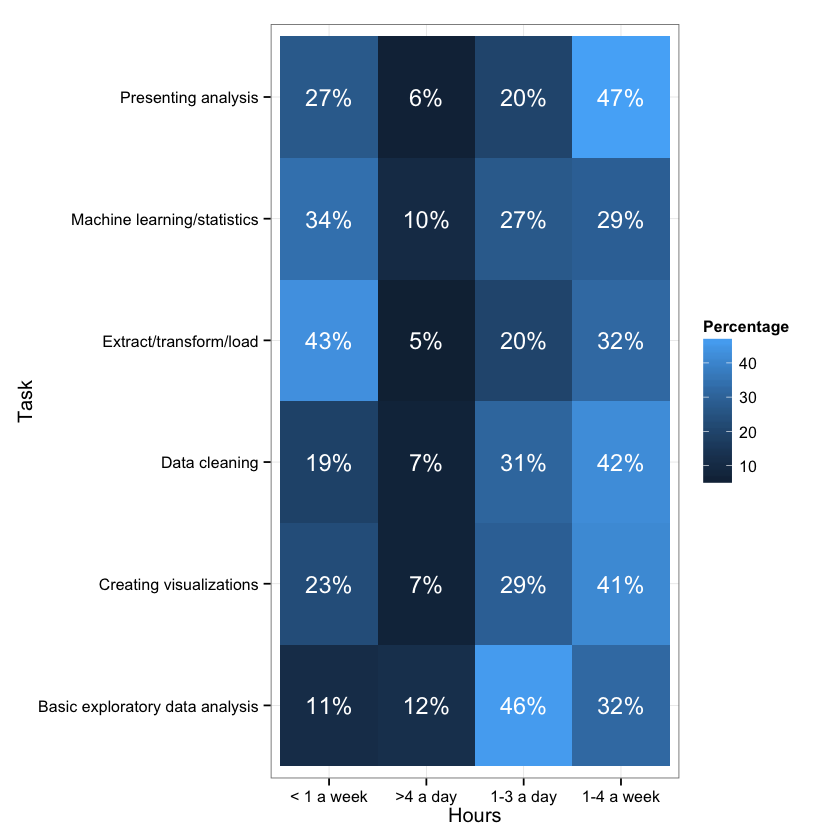

In [18]:
ggplot(d, aes(Hours, Task, fill = Percentage)) +
  geom_tile(show.legend = FALSE) +
  geom_text(aes(label = paste0(Percentage, "%")), color = "white")